# <center><span style="color:blue">AIRLINE ARRIVALS 2008</span></center>

### Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.
    1. The project should follow guideline as previous projects.
    2. Apply models in Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM.
    3. Apply PCA, SelectKBest and RFE for feature selections.
    4. Using gridsearchCV to obtain best parameters for models.
    5. Compare performances among models, write up analysis why the model is good or bad in the algorithmic approach (explain why the algorithm is good or bad for the dataset structure, can you do something to improve the model?)
    6. Include the conclusions

    Each entry of this file corresponds to a flight and we see that more than 7.009.728 flights have been recordeed in 2008. These fights are described by 29 variables. A description of these variables are

#### Name	Description

    * 1 Year	1987-2008

    * 2	Month	1-12

    * 3	DayofMonth	1-31

    * 4	DayOfWeek	1 (Monday) - 7 (Sunday)

    * 5	DepTime	actual departure time (local, hhmm)

    * 6	CRSDepTime	scheduled departure time (local, hhmm)

    * 7	ArrTime	actual arrival time (local, hhmm)

    * 8	CRSArrTime	scheduled arrival time (local, hhmm)

    * 9	UniqueCarrier	unique carrier code

    * 10	FlightNum	flight number

    * 11	TailNum	plane tail number

    * 12	ActualElapsedTime	in minutes

    * 13	CRSElapsedTime	in minutes

    * 14	AirTime	in minutes

    * 15	ArrDelay	arrival delay, in minutes

    * 16	DepDelay	departure delay, in minutes

    * 17	Origin	origin IATA airport code

    * 18	Dest	destination IATA airport code

    * 19	Distance	in miles

    * 20	TaxiIn	taxi in time, in minutes

    * 21	TaxiOut	taxi out time in minutes
    
    * 22	Cancelled	was the flight cancelled?

    * 23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

    * 24	Diverted	1 = yes, 0 = no

    * 25	CarrierDelay	in minutes

    * 26	WeatherDelay	in minutes

    * 27	NASDelay	in minutes

    * 28	SecurityDelay	in minutes

    * 29	LateAircraftDelay	in minutes
http://stat-computing.org/dataexpo/2009/the-data.html
    

# Initialize Google Driver API

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

-------------------------------------------------

# List all files in  a folder

In [3]:
file_list = drive.ListFile({'q': "'1-YZGx3TTna_Bm9R8q0I_jZ-AJ6neHVdY' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: 2008.csv, id: 1mhR6hMf2SXbjqQfc8bOjuUt6YBqVQ-o_
title: Airline Arrivals 2008.csv, id: 1uJOZIGrgpGI8jLTxtT9Nf2jW31wiU2RC
title: Airline_Arrivals_Cleaned1.csv, id: 1EyZUfGMTtzFG_f1uKd9qfRKfp7pSr0KA
title: hmeq.csv, id: 1Ch66HCXH7KIhaFWu6DDS74FFdQ03kWAx
title: GBM-XGBoots--master.zip, id: 1q4xzINzwD2ZzF4U5PIgVcYztxMC9FsHp


# Read dataset file (Airline Arrivals)

In [0]:
data = drive.CreateFile({'id': '1mhR6hMf2SXbjqQfc8bOjuUt6YBqVQ-o_'})
data.GetContentFile('2008.csv')

# Import some necessary libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# set to unlimited column and row display:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

# Read the data in dataframe format by using Pandas

In [0]:
df = pd.read_csv('2008.csv')

# Data structure at first glance

In [7]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


# Re-select cols that may affect to flight's delay

In [0]:
data = df[['ArrDelay','ActualElapsedTime','CRSArrTime','ArrTime','DepTime','CRSDepTime','DepDelay','Cancelled','Month','DayofMonth','DayOfWeek','Distance','FlightNum','UniqueCarrier','Origin','Dest','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','CarrierDelay']]

# Make a list of columns having missing values

(7009728, 21)

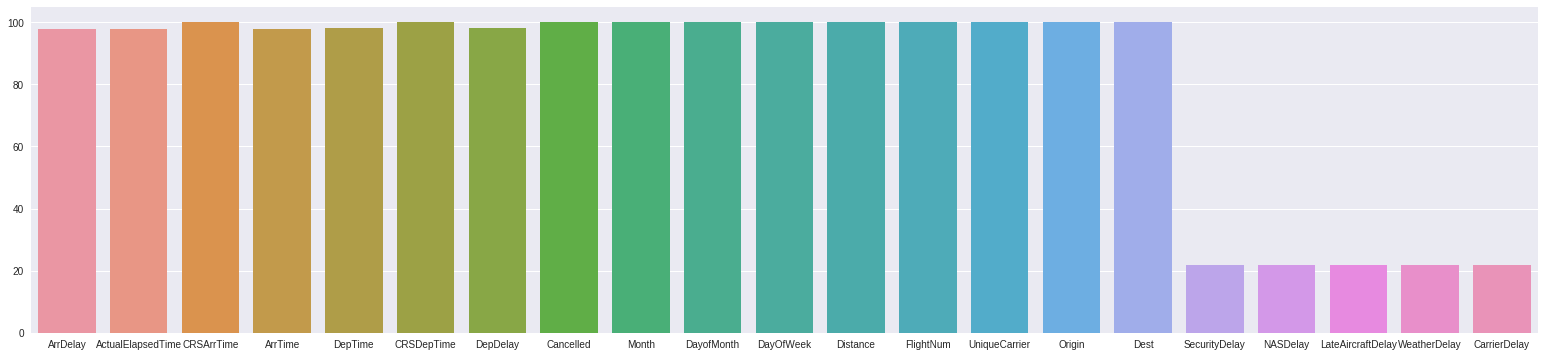

In [9]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variables','missing values']
missing_df['filling factor (%)'] = (data.shape[0]-missing_df['missing values'])/data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)
x=[]
y=[]
for i in missing_df.variables:
  x.append(i)
for j in missing_df['filling factor (%)']:
  y.append(j)
f,ax = plt.subplots(figsize=(27,6))
sns.barplot(x=x, y=y)
data.shape

#### Basically, our data  does not have much missing values except five elements might cause flight's delay such as CarrierDelay, LateAirCraft and so on. My solution is to fill all these NaN rows by replacing zero and replacing its mean value

In [0]:
data['CarrierDelay'].fillna(0,inplace=True)
data['LateAircraftDelay'].fillna(0,inplace=True)
data['NASDelay'].fillna(0,inplace=True)
data['SecurityDelay'].fillna(0,inplace=True)
data['WeatherDelay'].fillna(0,inplace=True)
data['ArrDelay'].fillna((int)(data['CRSDepTime'].mean()), inplace=True)
data['ActualElapsedTime'].fillna((int)(data['DepDelay'].mean()), inplace=True)
data['ArrTime'].fillna((int)(data['Cancelled'].mean()), inplace=True)
data['DepDelay'].fillna((int)(data['Month'].mean()), inplace=True)
data['DepTime'].fillna((int)(data['DayofMonth'].mean()), inplace=True)


(7009728, 21)

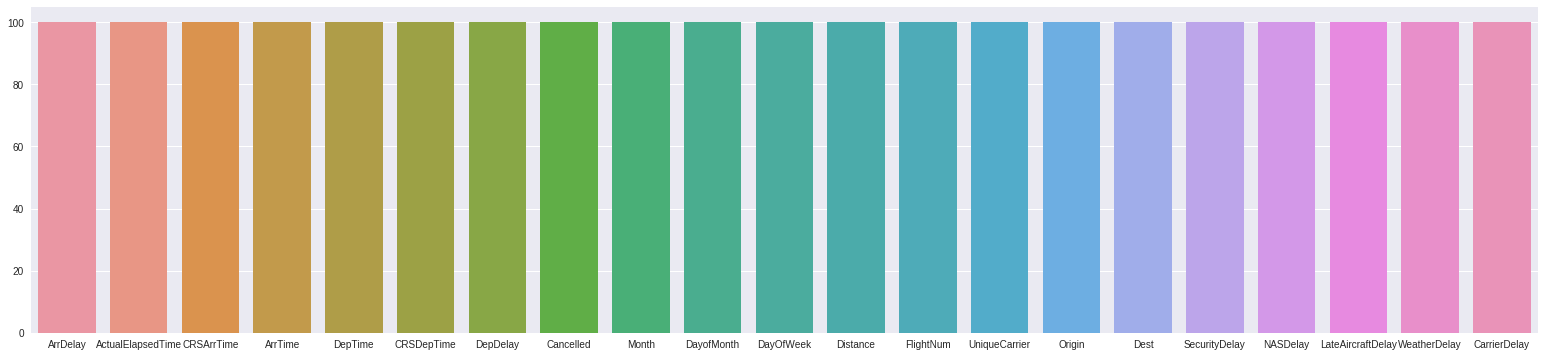

In [11]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variables','missing values']
missing_df['filling factor (%)'] = (data.shape[0]-missing_df['missing values'])/data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)
x=[]
y=[]
for i in missing_df.variables:
  x.append(i)
for j in missing_df['filling factor (%)']:
  y.append(j)
f,ax = plt.subplots(figsize=(27,6))
sns.barplot(x=x, y=y)
data.shape

### Insert a acolumn named "Late_or_AintLate" which indicates 'late' if ArrivalTime >30 mins and 'aint late' if ArrivalTime <30 mins

In [10]:
condi = [(data['ArrDelay'] >30)]
choi = ['late']
data['Late_or_AintLate'] = np.select(condi, choi, default='aint late')
data.head(3)

,ArrDelay,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Month,DayofMonth,DayOfWeek,Distance,FlightNum,UniqueCarrier,Origin,Dest,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,Late_or_AintLate
0,-14.0,128.0,2225,2211.0,2003.0,1955,8.0,0,1,3,4,810,335,WN,IAD,TPA,0.0,0.0,0.0,0.0,0.0,aint late
1,2.0,128.0,1000,1002.0,754.0,735,19.0,0,1,3,4,810,3231,WN,IAD,TPA,0.0,0.0,0.0,0.0,0.0,aint late
2,14.0,96.0,750,804.0,628.0,620,8.0,0,1,3,4,515,448,WN,IND,BWI,0.0,0.0,0.0,0.0,0.0,aint late


Late_or_AintLate
aint late    5953631
late         1056097
dtype: int64

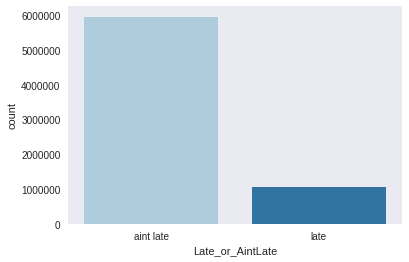

In [29]:
sns.countplot(x="Late_or_AintLate", data=data, palette="Paired");
data.groupby('Late_or_AintLate').size()

### => Class Imbalance in severe. With the rate of Aint late/late = 5.637 times

# Plot the correlations berween some timeline columns and Late/AintLate Columns

## DayofWeek/Late_or_AintLate in rate

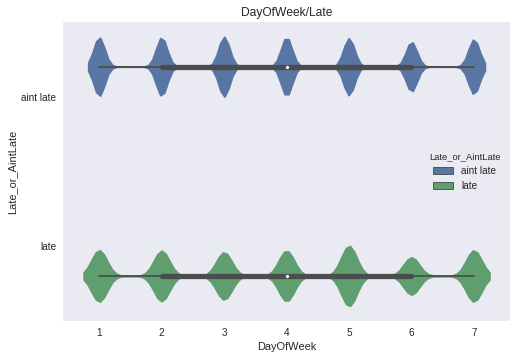

In [14]:
sns.set(style="dark")
ax = sns.violinplot(x='DayOfWeek',y='Late_or_AintLate',data=data,hue='Late_or_AintLate')
ax.set_title('DayOfWeek/Late')
plt.show()

## DayofMonth/Late_or_AintLate in rate

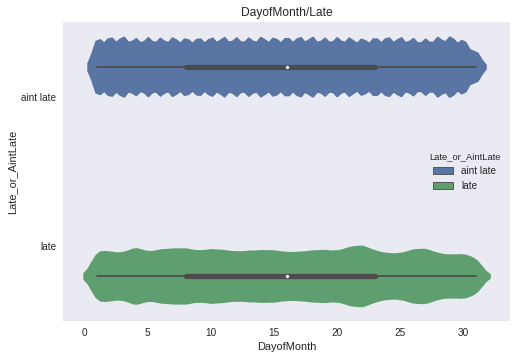

In [15]:
sns.set(style="dark")
ax = sns.violinplot(x='DayofMonth',y='Late_or_AintLate',data=data,hue='Late_or_AintLate')
ax.set_title('DayofMonth/Late')
plt.show()

## Month/Late_or_AintLate in rate

In [0]:
sns.set(style="dark")
ax = sns.violinplot(x='Month',y='Late_or_AintLate',data=data,hue='Late_or_AintLate')
ax.set_title('Month/Late')
plt.show()

# Types of Datatype

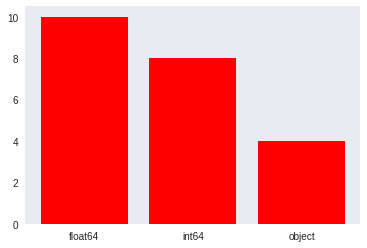

In [30]:
count={'float64':0,'int64':0,'object':0}
for i, j in data.dtypes.items():
  count[str(j)]=count[str(j)]+1
plt.bar(range(len(count)), list(count.values()), align='center', color='red')
plt.xticks(range(len(count)), list(count.keys()))
plt.show()

#### To models can understand these features, i will encode these cols object type UniqueCarrier, Origin, Dest like  into interger datatype

In [0]:
from sklearn.preprocessing import LabelEncoder
lbEncoder = LabelEncoder()
data['UniqueCarrier'] = lbEncoder.fit_transform(data.UniqueCarrier)
data['Origin'] = lbEncoder.fit_transform(data.Origin)
data['Dest'] = lbEncoder.fit_transform(data.Dest)
data['Late_or_AintLate'] = lbEncoder.fit_transform(data.Late_or_AintLate)

#### Check the result after encoding

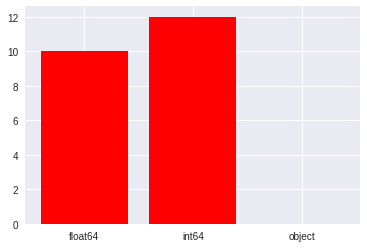

In [16]:
count={'float64':0,'int64':0,'object':0}
for i, j in data.dtypes.items():
  count[str(j)]=count[str(j)]+1
plt.bar(range(len(count)), list(count.values()), align='center', color='red')
plt.xticks(range(len(count)), list(count.keys()))
plt.show()

# Plot variable correlations

In [22]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr=data.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ArrDelay,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Month,DayofMonth,DayOfWeek,Distance,FlightNum,UniqueCarrier,Origin,Dest,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay
ArrDelay,1,-0.22,0.036,-0.37,-0.3,0.037,0.17,0.92,-0.034,-0.0073,-0.0033,-0.026,0.042,-0.014,-0.0061,-0.0049,0.0021,0.066,0.084,0.043,0.083
ActualElapsedTime,-0.22,1,0.046,0.13,0.066,-0.02,0.044,-0.23,-0.0071,0.0025,0.014,0.93,-0.32,-0.19,0.036,0.065,0.0052,0.15,0.021,0.013,0.031
CRSArrTime,0.036,0.046,1,0.78,0.73,0.79,0.13,0.013,0.00025,-0.0014,0.0052,0.046,-0.028,-0.017,-0.006,0.016,0.00055,0.052,0.12,0.021,0.02
ArrTime,-0.37,0.13,0.78,1,0.74,0.63,0.07,-0.38,0.012,0.0019,0.0052,0.038,-0.032,-0.0061,-0.0028,0.013,0.0023,0.067,0.053,0.0087,0.018
DepTime,-0.3,0.066,0.73,0.74,1,0.89,0.19,-0.36,0.0016,0.0017,0.0074,-0.0023,-0.021,0.014,-0.032,0.028,0.0033,0.081,0.17,0.037,0.067
CRSDepTime,0.037,-0.02,0.79,0.63,0.89,1,0.14,0.016,-0.0082,-0.0014,0.0053,-0.013,-0.011,0.011,-0.036,0.028,-0.00018,0.037,0.13,0.021,0.022
DepDelay,0.17,0.044,0.13,0.07,0.19,0.14,1,-0.014,-0.029,0.0034,0.015,0.027,0.009,-0.005,-0.0067,0.004,0.025,0.36,0.64,0.28,0.6
Cancelled,0.92,-0.23,0.013,-0.38,-0.36,0.016,-0.014,1,-0.028,-0.0084,-0.0063,-0.037,0.042,-0.0076,-0.0032,-0.0046,-0.0027,-0.032,-0.032,-0.01,-0.025
Month,-0.034,-0.0071,0.00025,0.012,0.0016,-0.0082,-0.029,-0.028,1,0.0018,-0.0037,-0.0041,0.0025,-0.0056,-0.0082,-0.0083,-0.0032,-0.015,-0.019,-0.0038,-0.016
DayofMonth,-0.0073,0.0025,-0.0014,0.0019,0.0017,-0.0014,0.0034,-0.0084,0.0018,1,0.0057,0.0018,-0.00068,-0.0011,7.6e-05,8.8e-05,-0.00019,0.001,0.0033,0.00035,-0.00043


-------------------------------------------------

# Applying Models

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [0]:
feature_columns = ['ArrDelay','ActualElapsedTime','CRSArrTime','ArrTime','DepTime','CRSDepTime','DepDelay','Cancelled','Month','DayofMonth','DayOfWeek','Distance','FlightNum','UniqueCarrier','Origin','Dest','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','CarrierDelay']
X = data[feature_columns]
y = data.Late_or_AintLate

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
print(X_train.shape,y_train.shape)

(5257296, 21) (5257296,)


In [18]:
print(X_test.shape,y_test.shape)

(1752432, 21) (1752432,)


# Scale Data by using MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Naive-Bayes - SelectKBest

In [20]:
clf = MultinomialNB()
pp_naivebayes_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k='all')),('nb_clf', clf)])
pp_naivebayes_clf.fit(X_scaled, y_train)

Pipeline(memory=None,
     steps=[('k_best', SelectKBest(k='all', score_func=<function chi2 at 0x7fd195417e18>)), ('nb_clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [21]:
y_pred = pp_naivebayes_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.13      0.23    264141

avg / total       0.89      0.87      0.82   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

# Naive-Bayes - RFE

In [22]:
pp_naivebayes_clf = Pipeline([('rfe', RFE(clf, 200)),
                           ('nb_clf', clf)])
pp_naivebayes_clf.fit(X_scaled, y_train)
y_pred = pp_naivebayes_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.13      0.23    264141

avg / total       0.89      0.87      0.82   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

# Logistic Regression - SelectKBest

In [24]:
pp_log_clf = Pipeline([('k_best', SelectKBest(score_func=chi2,k='all')),
                           ('log_clf', LogisticRegression())])
pp_log_clf.fit(X_scaled, y_train)
y_pred = pp_log_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.15      0.27    264141

avg / total       0.89      0.87      0.83   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

# Logistic Regression - RFE

In [25]:
pp_log_clf = Pipeline([('rfe', RFE(LogisticRegression(), 200)),
                           ('log_clf', LogisticRegression())])
pp_log_clf.fit(X_scaled, y_train)
y_pred = pp_log_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.15      0.27    264141

avg / total       0.89      0.87      0.83   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

# Decision Tree - SelectKBest

In [26]:
pp_tree_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k='all')),
                           ('tree_clf', tree.DecisionTreeClassifier(max_depth=4))])
pp_tree_clf.fit(X_scaled, y_train)
y_pred = pp_tree_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.15      0.26    264141

avg / total       0.89      0.87      0.83   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

# Decision Tree - RFE

In [27]:
pp_tree_clf = Pipeline([('rfe', RFE(LogisticRegression(), 200)),
                           ('log_clf', tree.DecisionTreeClassifier(max_depth=4))])
pp_tree_clf.fit(X_scaled, y_train)
y_pred = pp_tree_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.15      0.26    264141

avg / total       0.89      0.87      0.83   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

# Random Forest- SelectKBest

In [28]:
pp_ranforest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k='all')),
                           ('forest_clf',RandomForestClassifier(max_depth=4))])
pp_ranforest_clf.fit(X_scaled, y_train)
y_pred = pp_ranforest_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.15      0.27    264141

avg / total       0.89      0.87      0.83   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

# Random Forest- RFE

In [29]:
pp_ranforest_clf = Pipeline([('rfe', RFE(LogisticRegression(), 200)),
                           ('forest_clf',RandomForestClassifier(n_estimators=200, max_depth=4))])
pp_ranforest_clf.fit(X_scaled, y_train)
y_pred = pp_ranforest_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   1488291
          1       1.00      0.15      0.26    264141

avg / total       0.89      0.87      0.83   1752432



<strong>Comment: </strong> In general, because of class imbalance, 

------------------------------------------

# Class Balanced

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [19]:
data.Late_or_AintLate.value_counts()

0    5953631
1    1056097
Name: Late_or_AintLate, dtype: int64

In [0]:
overall_pos = data[data['Late_or_AintLate']==0].sample(n=1056097,random_state=100)
overall_nev = data[data['Late_or_AintLate']==1]
new_data = overall_pos.append(overall_nev)

Late_or_AintLate
0    1056097
1    1056097
dtype: int64

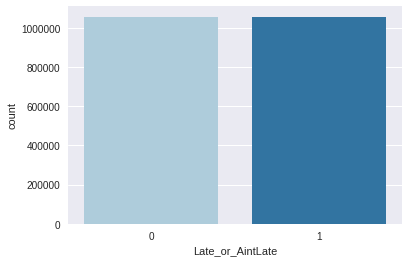

In [23]:
sns.countplot(x="Late_or_AintLate", data=new_data, palette="Paired");
new_data.groupby('Late_or_AintLate').size()

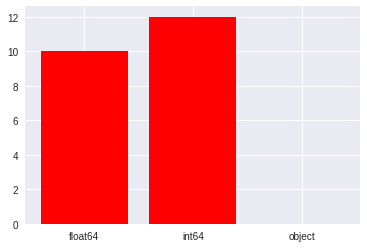

In [24]:
count={'float64':0,'int64':0,'object':0}
for i, j in new_data.dtypes.items():
  count[str(j)]=count[str(j)]+1
plt.bar(range(len(count)), list(count.values()), align='center', color='red')
plt.xticks(range(len(count)), list(count.keys()))
plt.show()

In [0]:
feature_columns = ['ArrDelay','ActualElapsedTime','CRSArrTime','ArrTime','DepTime','CRSDepTime','DepDelay','Cancelled','Month','DayofMonth','DayOfWeek','Distance','FlightNum','UniqueCarrier','Origin','Dest','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','CarrierDelay']
X = new_data[feature_columns]
y = new_data.Late_or_AintLate

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Scale Data by using MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Naive-Bayes - SelectKBest

In [28]:
clf = MultinomialNB()
pp_naivebayes_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k='all')),('nb_clf', clf)])
pp_naivebayes_clf.fit(X_scaled, y_train)
y_pred = pp_naivebayes_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      1.00      0.79    264084
          1       1.00      0.46      0.63    263965

avg / total       0.82      0.73      0.71    528049



# Naive-Bayes - RFE

In [29]:
pp_naivebayes_clf = Pipeline([('rfe', RFE(clf, 200)),
                           ('nb_clf', clf)])
pp_naivebayes_clf.fit(X_scaled, y_train)
y_pred = pp_naivebayes_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      1.00      0.79    264084
          1       1.00      0.46      0.63    263965

avg / total       0.82      0.73      0.71    528049



# Logistic Regression - SelectKBest

In [30]:
pp_log_clf = Pipeline([('k_best', SelectKBest(score_func=chi2,k='all')),
                           ('log_clf', LogisticRegression())])
pp_log_clf.fit(X_scaled, y_train)
y_pred = pp_log_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      1.00      0.84    264084
          1       1.00      0.62      0.77    263965

avg / total       0.86      0.81      0.80    528049



# Logistic Regression - RFE

In [31]:
pp_log_clf = Pipeline([('rfe', RFE(LogisticRegression(), 200)),
                           ('log_clf', LogisticRegression())])
pp_log_clf.fit(X_scaled, y_train)
y_pred = pp_log_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      1.00      0.84    264084
          1       1.00      0.62      0.77    263965

avg / total       0.86      0.81      0.80    528049



# Decision Treee - SelectkBest

In [32]:
pp_tree_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k='all')),
                           ('tree_clf', tree.DecisionTreeClassifier(max_depth=4))])
pp_tree_clf.fit(X_scaled, y_train)
y_pred = pp_tree_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.63      1.00      0.77    264084
          1       1.00      0.40      0.58    263965

avg / total       0.81      0.70      0.67    528049



# Random Forest- SelectKBest

In [33]:
pp_tree_clf = Pipeline([('rfe', RFE(LogisticRegression(), 200)),
                           ('log_clf', tree.DecisionTreeClassifier(max_depth=4))])
pp_tree_clf.fit(X_scaled, y_train)
y_pred = pp_tree_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.63      1.00      0.77    264084
          1       1.00      0.40      0.58    263965

avg / total       0.81      0.70      0.67    528049



# Random Forest- RFE

In [34]:
pp_ranforest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k='all')),
                           ('forest_clf',RandomForestClassifier(max_depth=4))])
pp_ranforest_clf.fit(X_scaled, y_train)
y_pred = pp_ranforest_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.63      1.00      0.78    264084
          1       1.00      0.42      0.60    263965

avg / total       0.82      0.71      0.69    528049



In [0]:
pp_ranforest_clf = Pipeline([('rfe', RFE(LogisticRegression(), 200)),
                           ('forest_clf',RandomForestClassifier(n_estimators=200, max_depth=4))])
pp_ranforest_clf.fit(X_scaled, y_train)
y_pred = pp_ranforest_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))